<a href="https://colab.research.google.com/github/noor60/linear-classification/blob/main/linearclassificaiton_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
type(data) # bunch is an object it basically acts like a dictionalry where you can treat keys as atributes

sklearn.utils.Bunch

In [ ]:
data.keys() # data refers to input x data target is y 

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data.data.shape #to check shape of x it has 569 samples and 30 features

(569, 30)

In [ ]:
data.target # 1 dimentional array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names.shape

(2,)

In [ ]:
data.DESCR
data.feature_names #3o feature names of data
data.filename

'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/breast_cancer.csv'

In [ ]:
#now split data into test and train
from sklearn.model_selection import train_test_split


In [ ]:
#split data into test 
X=data.data
Y=data.target
x_train, x_test, y_train, y_test =train_test_split(X,Y,test_size=0.30)

In [ ]:
#see out of 569 how many samples are in x trian
N,D=x_train.shape
print (N,D)

398 30


In [ ]:
#see out of 569 how many samples are in x trian
x_test.shape

(171, 30)

In [ ]:
#y trian == xtrain
y_train.shape

(398,)

In [ ]:
print(N,D)

398 30


SCALING DATA IS IMPORTAN IN DEEP LEARNING.the basic idea is that, since the output y islinear combination of the input x, you dont want one input to have a very large range e.g one input is i milion and other is 0.0001.when this happens then weights will be too sensitive when input has large range and not sensitive enough when input has small range. meaning weight will b ebiased towards larger numbers.so we do normalization/standardization z=x-u/standard deviatin. subtract by mean 


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [ ]:
#here starts our tensor flow work we first need to build model object whcih is sequential, takes list of two layer objects. input an ddense layer
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)), #PLACEHOLDER SPECIFY SIZE OF INPUT
                                    tf.keras.layers.Dense(1, activation='sigmoid') #TAKESinput and does linear transformation tp get an output of size 1
])                                                                                 #we apply igmoid that oututs are in range 0 and1

In [ ]:
model.compile(
    optimizer='adam',
   loss='binary_crossentropy',
    metrics=['accuracy']
              )

In [ ]:
#fitting model, model.fit returns an object that contain the data from trianing process
r=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 35ms/step - loss: 0.4434 - accuracy: 0.8432 - val_loss: 0.4155 - val_accuracy: 0.8772
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4346 - accuracy: 0.8585 - val_loss: 0.3863 - val_accuracy: 0.8889
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4160 - accuracy: 0.8444 - val_loss: 0.3605 - val_accuracy: 0.9006
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3460 - accuracy: 0.8952 - val_loss: 0.3382 - val_accuracy: 0.9064
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3305 - accuracy: 0.8963 - val_loss: 0.3191 - val_accuracy: 0.9064
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3074 - accuracy: 0.8996 - val_loss: 0.3022 - val_accuracy: 0.9240
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2900 - accuracy: 0.9180 - val_loss: 0.2865 - val_accuracy: 0.9240
Epoch 8/100


In [ ]:
print("train score:",model.evaluate(x_train,y_train))
print("test score", model.evaluate(x_test,y_test))

13/13 [==============================] - 0s 1ms/step - loss: 0.0833 - accuracy: 0.9799
train score: [0.08329147845506668, 0.979899525642395]
6/6 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9825
test score [0.08554494380950928, 0.9824561476707458]


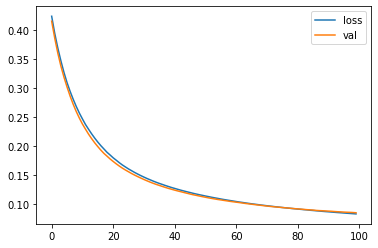

In [ ]:
#since model.fit returns an object that contain the data from trianing process, lets calculate loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val')
plt.legend() #there is steady decrease in loss per iteration aa expected

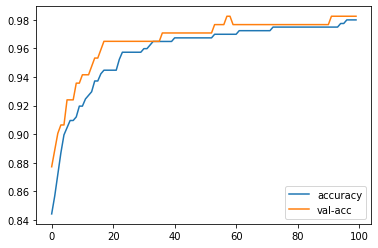

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val-acc')
plt.legend()

linear regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **model** **pridiction** 

In [ ]:
p=model.predict(x_test) #make pridiction of model, modelare usefull as they can be used to make pridiction for future for data you have never seen before
#fit is basically loop the gradeint descent
#for pridiction of linear we use y=wtx+b and for logistic we use sigmoid of wtx+b
print(p)

[[9.49749351e-01]
 [1.57829225e-02]
 [7.77714158e-05]
 [8.67414951e-01]
 [9.97849941e-01]
 [9.54482913e-01]
 [9.95328546e-01]
 [9.94712651e-01]
 [6.64066802e-09]
 [9.97568667e-01]
 [9.27826285e-01]
 [8.75897348e-01]
 [9.98300314e-01]
 [9.98189569e-01]
 [2.49028206e-04]
 [9.99946833e-01]
 [9.99307275e-01]
 [9.90229368e-01]
 [2.08735637e-05]
 [9.92554128e-01]
 [9.98899400e-01]
 [9.99128520e-01]
 [9.91148353e-01]
 [9.99049425e-01]
 [1.07933760e-01]
 [9.98121381e-01]
 [9.96439457e-01]
 [9.73945260e-01]
 [9.98454332e-01]
 [9.98466194e-01]
 [9.96705532e-01]
 [9.91103351e-01]
 [9.94873881e-01]
 [4.38580318e-11]
 [2.12268751e-05]
 [9.99947548e-01]
 [9.34831321e-01]
 [4.40251370e-06]
 [1.51388645e-02]
 [9.97574925e-01]
 [5.86614013e-01]
 [9.81855750e-01]
 [2.47061253e-04]
 [8.77763987e-01]
 [9.64463353e-01]
 [2.19748914e-02]
 [5.34701176e-05]
 [7.87547350e-01]
 [9.76881027e-01]
 [9.22394753e-01]
 [2.63214111e-04]
 [5.22607386e-01]
 [9.98646140e-01]
 [1.03315711e-03]
 [1.48266554e-03]
 [9.345480

In [ ]:
P= np.round(p).flatten()
print(P)

[1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1.]


In [ ]:
model.save('linearclassification.h5')

In [ ]:
!ls -1h

linearclassification.h5
sample_data


In [ ]:
ls


linearclassification.h5  sample_data/


In [ ]:
model = tf.keras.models.load_model('linearclassification.h5') #you have saved the model
print(model.layers)
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9825


[0.08554494380950928, 0.9824561476707458]

In [ ]:
#how to share the model with others